# Classificação

Disciplina: Engenharia da Informação

Nome: Vinícius Barbosa da Silva e

Leidjane de Jesus Araújo Campos

Foi utilizado o Dataset FIFA World Cup 2022 Tweets disponível em: https://www.kaggle.com/datasets/tirendazacademy/fifa-world-cup-2022-tweets

Quatro algoritmos de classificação populares para comparar o desempenho de cada um deles na tarefa de classificação de Tweets por sentimento:

-Naive Bayes

-Regressão logística

-Árvore de decisão

-Random Forest

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#Preparação dos dados

In [ ]:
# Carregando o conjunto de dados de filmes
df = pd.read_csv('fifaset.csv')

In [ ]:
df.head()

,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment
0,0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,neutral
1,1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive
2,2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,positive
3,3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,positive
4,4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",negative


In [ ]:
df.Sentiment.value_counts()

positive    8489
neutral     8251
negative    5784
Name: Sentiment, dtype: int64

In [ ]:
df['Sentiment'] = df['Sentiment'].map({'positive': 1, 'negative': 0, 'neutral':2})

In [ ]:
df.head()

,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment
0,0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,2
1,1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,1
2,2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,1
3,3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,1
4,4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",0


In [ ]:
def preprocess(text):
    # Converter o texto para minúsculo
    text = text.lower()

    # Remover números
    text = re.sub(r'\d+', '', text)

    # Remover caracteres especiais e pontuação
    text = re.sub(r'[^\w\s]', '', text)

    # Remover stop words
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]

    # Remover palavras com menos de 3 caracteres
    tokens = [word for word in tokens if len(word) > 2]

    # Remover palavras com apenas uma letra
    tokens = [word for word in tokens if len(word) > 1]

    # Juntar as palavras em uma única string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

In [ ]:
# Aplicar a função preprocess à coluna de texto
df['Tweet'] = df['Tweet'].apply(preprocess)

# Exibir o DataFrame com a nova coluna de texto preprocessado
df.head()

,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment
0,0,2022-11-20 23:59:21+00:00,4,Twitter Web App,drinking today tucantribe madbears_ lkinc_algo...,2
1,1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,amazing canadasocceren worldcup launch video s...,1
2,2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,worth reading watching worldcup httpstcosqrnadyu,1
3,3,2022-11-20 23:58:33+00:00,1,Twitter Web App,golden maknae shinning bright httpstcoayzbzgtx...,1
4,4,2022-11-20 23:58:28+00:00,0,Twitter for Android,bbc cares much human rights homosexual rights ...,0


#Preparação para o modelo

In [ ]:
# Separando em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(df['Tweet'], df['Sentiment'], test_size=0.2, random_state=82)

# Criando vetorizador de palavras
vectorizer = CountVectorizer()

# Transformando os textos em vetor de palavras
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

#01 - Naive Bayes


In [ ]:
from sklearn.naive_bayes import MultinomialNB


# Criando modelo de classificação Naive Bayes
nb = MultinomialNB()

# Treinando o modelo com o conjunto de treino
nb.fit(X_train_vec, y_train)

# Prevendo o conjunto de teste
y_pred = nb.predict(X_test_vec)

# Avaliando a acurácia do modelo
acc = accuracy_score(y_test, y_pred)
print("Naive Bayes:\n")
print(classification_report(y_test, y_pred))
print(f'Acurácia: {acc:.2f}')

Naive Bayes:

              precision    recall  f1-score   support

           0       0.63      0.80      0.71      1104
           1       0.74      0.73      0.74      1739
           2       0.67      0.57      0.61      1662

    accuracy                           0.68      4505
   macro avg       0.68      0.70      0.68      4505
weighted avg       0.69      0.68      0.68      4505

Acurácia: 0.68


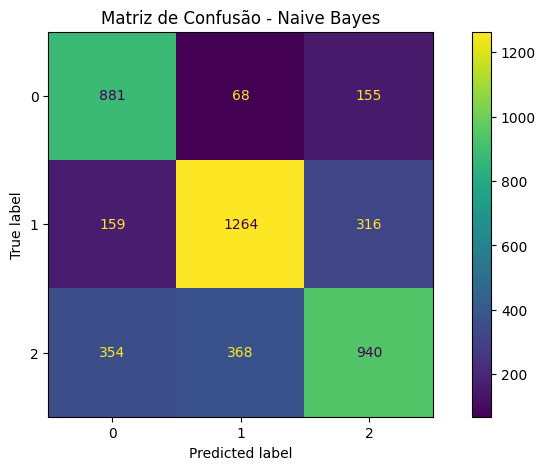

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax)
_ = ax.set_title(f"Matriz de Confusão - Naive Bayes")

In [ ]:
# Testando com um comentário próprio
#comment = "He is just a man"
#comment = "He is a good man"
comment = "He is a bad man"
comment_processed = preprocess(comment)
comment_vec = vectorizer.transform([comment_processed])
prediction = nb.predict(comment_vec)

# Imprimindo a previsão
if prediction[0] == 0:
    print("O modelo prevê que o comentário negativo.")
if prediction[0] == 1:
    print("O modelo prevê que o comentário é positivo.")
if prediction[0] == 2:
    print("O modelo prevê que o comentário é neutro.")

O modelo prevê que o comentário negativo.


# 02 - Árvore de Decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier


# Criando modelo de classificação Árvore de Decisão
dt = DecisionTreeClassifier(random_state=42)

# Treinando o modelo com o conjunto de treino
dt.fit(X_train_vec, y_train)

# Prevendo o conjunto de teste
y_pred = dt.predict(X_test_vec)

# Avaliando a acurácia do modelo
acc = accuracy_score(y_test, y_pred)
print("Árvore de Decisão:\n")
print(classification_report(y_test, y_pred))
print(f'Acurácia: {acc:.2f}')

Árvore de Decisão:

              precision    recall  f1-score   support

           0       0.61      0.56      0.58      1104
           1       0.67      0.69      0.68      1739
           2       0.60      0.61      0.60      1662

    accuracy                           0.63      4505
   macro avg       0.63      0.62      0.62      4505
weighted avg       0.63      0.63      0.63      4505

Acurácia: 0.63


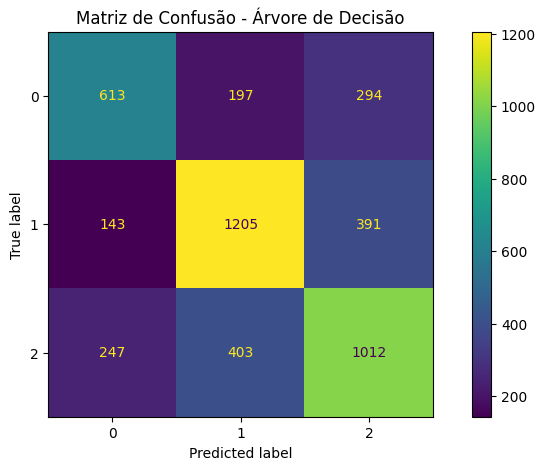

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax)
_ = ax.set_title(f"Matriz de Confusão - Árvore de Decisão")

In [ ]:
# Testando com um comentário próprio
#comment = "He is just a man"
comment = "He is a good man"
#comment = "He is a bad man"
comment_processed = preprocess(comment)
comment_vec = vectorizer.transform([comment_processed])
prediction = dt.predict(comment_vec)
# Imprimindo a previsão
print(prediction)

# Imprimindo a previsão
if prediction[0] == 0:
    print("O modelo prevê que o comentário negativo.")
if prediction[0] == 1:
    print("O modelo prevê que o comentário é positivo.")
if prediction[0] == 2:
    print("O modelo prevê que o comentário é neutro.")

[1]
O modelo prevê que o comentário é positivo.


#03 - Regressão Logística

In [ ]:
from sklearn.linear_model import LogisticRegression

# Criando modelo de Regressão Logística
lr = LogisticRegression()

# Treinando o modelo com o conjunto de treino
lr.fit(X_train_vec, y_train)

# Prevendo o conjunto de teste
y_pred = lr.predict(X_test_vec)

# Avaliando a acurácia do modelo
acc = accuracy_score(y_test, y_pred)
print("Regressão Logística:\n")
print(classification_report(y_test, y_pred))
print(f'Acurácia: {acc:.2f}')

Regressão Logística:

              precision    recall  f1-score   support

           0       0.75      0.68      0.71      1104
           1       0.75      0.75      0.75      1739
           2       0.66      0.71      0.68      1662

    accuracy                           0.72      4505
   macro avg       0.72      0.71      0.72      4505
weighted avg       0.72      0.72      0.72      4505

Acurácia: 0.72


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


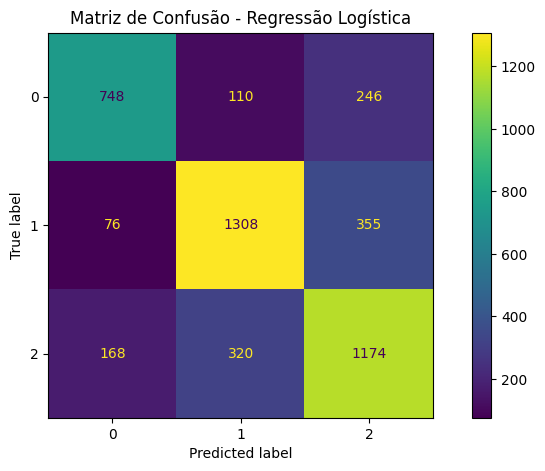

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax)
_ = ax.set_title(f"Matriz de Confusão - Regressão Logística")

In [ ]:
# Testando com um comentário próprio
#comment = "He is just a player"
#comment = "he played bad"
comment = "He is a good man, but need to be more confident"
comment_processed = preprocess(comment)
comment_vec = vectorizer.transform([comment_processed])
prediction = dt.predict(comment_vec)
# Imprimindo a previsão
print(prediction)

# Imprimindo a previsão
if prediction[0] == 0:
    print("O modelo prevê que o comentário negativo.")
if prediction[0] == 1:
    print("O modelo prevê que o comentário é positivo.")
if prediction[0] == 2:
    print("O modelo prevê que o comentário é neutro.")

[1]
O modelo prevê que o comentário é positivo.


# 04 - Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Criando modelo de Random Forest
rf = RandomForestClassifier()

# Treinando o modelo com o conjunto de treino
rf.fit(X_train_vec, y_train)

# Prevendo o conjunto de teste
y_pred_rf = rf.predict(X_test_vec)

# Avaliando a acurácia do modelo
acc = accuracy_score(y_test, y_pred)
print("Random Forest:\n")
print(classification_report(y_test, y_pred))
print(f'Acurácia: {acc:.2f}')

Random Forest:

              precision    recall  f1-score   support

           0       0.75      0.68      0.71      1104
           1       0.75      0.75      0.75      1739
           2       0.66      0.71      0.68      1662

    accuracy                           0.72      4505
   macro avg       0.72      0.71      0.72      4505
weighted avg       0.72      0.72      0.72      4505

Acurácia: 0.72


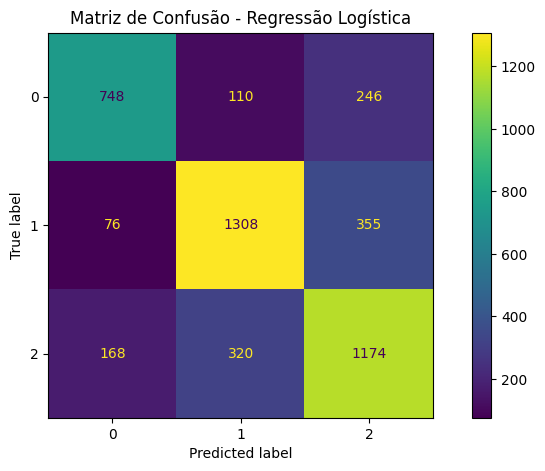

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax)
_ = ax.set_title(f"Matriz de Confusão - Regressão Logística")

In [ ]:
# Testando com um comentário próprio
#comment = "He is just a player"
comment = "the player kicked the ball carelessly, played bad"
#comment = "He is a good man, but need to be more confident"
comment_processed = preprocess(comment)
comment_vec = vectorizer.transform([comment_processed])
prediction = dt.predict(comment_vec)
# Imprimindo a previsão
print(prediction)

# Imprimindo a previsão
if prediction[0] == 0:
    print("O modelo prevê que o comentário negativo.")
if prediction[0] == 1:
    print("O modelo prevê que o comentário é positivo.")
if prediction[0] == 2:
    print("O modelo prevê que o comentário é neutro.")

[0]
O modelo prevê que o comentário negativo.
